# Deep Learning

## HW1- problem 2- Support Vector Machine (100 + 10 pts)

### Please fill this part


1.   Full Name: Mohammad Kalbasi
2.   Student Number: 401211028


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [ ]:
# You are not allowed to import other packages.
import numpy as np
import pandas as pd
 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC

import cvxopt

#### About the Data:
Heart diseases, also known as [Cardiovascular diseases (CVDs)](https://en.wikipedia.org/wiki/Cardiovascular_disease), are the first cause of death worldwide, taking an estimated 17.9 million lives each year which is about 32% of all deaths all over the world. 

In the present HomeWork, we are going to implement Support Vector Machines (SVM) algorithm that determines which patient is in danger and which is not.

For this perpose, `Heart_Disease_Dataset.csv` file can be used that is attached to the HomeWork folder. Use `Dataset_Description.pdf` for more detail.


In [ ]:
df = pd.read_csv("./Heart_Disease_Dataset.csv") 

### Pre-Processing - (40 pts)

#### Exploratory Data Analysis (EDA):
In statistics, exploratory data analysis is an approach to analyze datasets to summarize their main characteristics, often using statistical graphics and other data visualization methods.

This is a general approach that should be applied when you encounter a dataset.

In [ ]:
# showing data to have a sense of it
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


shape of dataset is:  (1190, 12)
this dataset has not missing value
ballanced: True


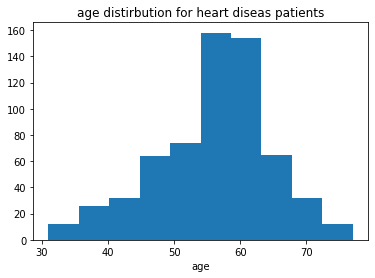

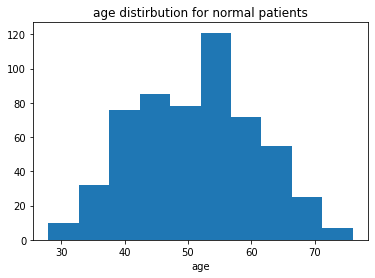

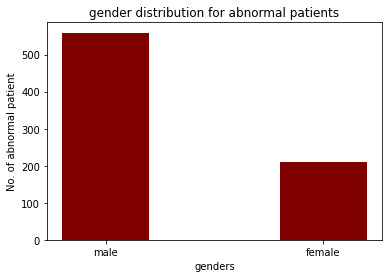

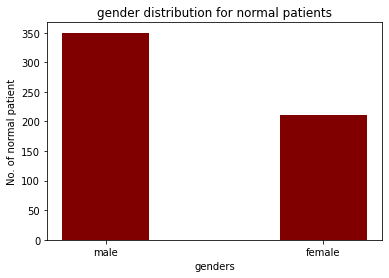

In [ ]:
###############################################################################
## TODO: Find the shape of the dataset.                                      ##
###############################################################################
shape = df.shape
print("shape of dataset is: " , shape)

###############################################################################
## TODO: Check if there is missing entries in the dataset columnwise.        ##
###############################################################################
missings = np.asarray(df.isnull()).sum()
if ( not missings):
  print("this dataset has not missing value")
else:
   print("this dataset has  missing value")

###############################################################################
## TODO: Check whether the dataset is balanced or not.                       ##
## If the difference between 2 classes was less than 100 for our dataset,    ##
## it is called "ballanced".                                                 ##
###############################################################################
target_labels = np.asarray(df['target'])
compare_balance = np.abs(np.sum(target_labels == 0) - np.sum(target_labels == 1))
if compare_balance < 100:
  print("ballanced: True")
else:
  print("ballanced: False")

###############################################################################
## TODO: plot the age distirbution and gender distrbution for both normal    ##
## and heart diseses patients.(4 plots)                                      ##
###############################################################################
age_val = np.asarray(df['age'])
gender_val = np.asarray(df['sex'])
label_val = np.asarray(df['target'])

plt.hist(age_val[label_val == 1])
plt.title('age distirbution for heart diseas patients')
plt.xlabel('age')
plt.show() 


plt.hist(age_val[label_val == 0])
plt.title('age distirbution for normal patients')
plt.xlabel('age')
plt.show() 

male_normal = np.sum(gender_val[label_val == 0] == 1)
male_abnormal = np.sum(gender_val[label_val == 1 ] == 1)
female_normal = np.sum(gender_val[label_val == 0] == 0)
female_abnormal = np.sum(gender_val[label_val == 0] == 0)
abnormal_dict = {'male':male_abnormal,'female':female_abnormal}
genders = list(abnormal_dict.keys())
values = list(abnormal_dict.values())
  
 
# creating the bar plot
plt.bar(genders, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("genders")
plt.ylabel("No. of abnormal patient")
plt.title("gender distribution for abnormal patients")
plt.show()



normal_dict = {'male':male_normal,'female':female_normal}


genders = list(normal_dict.keys())
values = list(normal_dict.values())
  
 
# creating the bar plot
plt.bar(genders, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("genders")
plt.ylabel("No. of normal patient")
plt.title("gender distribution for normal patients")
plt.show()




#### Question 1: What do you conclude from the plots?
#### Answer: there seems to be direct correlation between age and having heart problem, the older you get the higher the risk of having heart problem gets! and also if we compare ration of male/female for normal and abnormal patients, it is observed that it's larger in abnormal patients, meaning that probability of having heart problem is higher for men than women

#### Outlier Detection & Removal:
We will filter ouliers using Z-test.

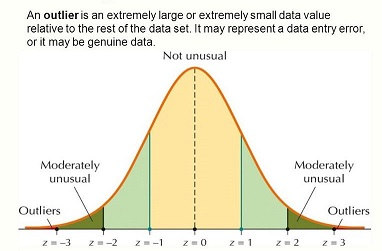

Z-test formula:
\begin{equation*}
    Z = \bigg|\frac {x - mu} {std}\bigg|
\end{equation*}

In [ ]:
################################################################################
## TODO: Suppose that, based on our prior knowledge, we know some columns have##
## outliers. Calculate z-score for each featuer and determine the outliers    ##
## with threshold=3, then eliminate them. Target dataframe has(1173,12)shape. ##
################################################################################
df = pd.read_csv("./Heart_Disease_Dataset.csv")  # for reproducibility we add this part so we can run this block independently of previous ones
columns = ["age","resting bp s","cholesterol","max heart rate"]
threshold = 3
delet_index = []
for col_chosen in columns:
  mu = np.mean(df[col_chosen])
  std = np.std(df[col_chosen])
  for i in range(len(df[col_chosen])):
    Z = np.abs((df[col_chosen][i]-mu)/std)
    if (Z>threshold):
      delet_index.append(i)


df.drop(delet_index,inplace=True )

print(f"shape of df after Z-test = {df.shape}")
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

shape of df after Z-test = (1173, 12)


#### Feature Engineering:
Sometimes the collected data are raw; they are either incompatible with your model or hinders its performance. That’s when feature engineering comes to rescue. It encompasses preprocessing techniques to compile a dataset by extracting features from raw data.


In [ ]:
################################################################################
## TODO: Normalize numerical features to be between 0 and 1                   ##
## Note that just numerical fetures should be normalized. type of features is ##
## determined in dataset description file.                                    ##
################################################################################

keys = ['age','resting bp s','cholesterol','max heart rate','oldpeak']
for selected in keys:
  df[selected] = (df[selected] - np.min(df[selected]))/(np.max(df[selected])- np.min(df[selected]))


################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

### SVM - (60 pts)

#### spliting data

In [ ]:
# The original dataset labels is 0 and 1 and in the following code we change it to -1 and 1. 
df.target.replace(0 , -1 , inplace = True) 

# Turn pandas dataframe to numpy array type
df = df.to_numpy()

# Splitting data into train and test part. 70% for train and 30% for test
train = df[:int(len(df) * 0.7)]
test = df[int(len(df) * 0.7):]

# Getting features 
X_train = train[: , :-1]
y_train = train[: , -1]

# Getting labels
X_test = test[: , :-1]
y_test = test[: , -1]

# shapes should be: 
# Train: (821, 11) (821,)
# Test: (352, 11) (352,)
print("Train: ", X_train.shape ,y_train.shape)
print("Test: " ,X_test.shape ,y_test.shape)


Train:  (821, 11) (821,)
Test:  (352, 11) (352,)


#### SVM Using sklearn:
Use the standard libarary SVM classifier (SVC) on the training data, and then test the classifier on the test data. You will need to call SVM with 3 kernels: (1) Linear, (2) Polynomial and (3) RBF. You can change C to achive better results. For "RBF" find "gamma" witch takes 90% accuracy, at least. For polynomial kernel you are allowed to change "degree" to find best results.

For each kernel, reportting the followings is required:
Accuracy, Precision, Recall, F1score.

In [ ]:
def classification_report(y_true, y_pred):
    #################################################################################
    ## TODO: Define a function that returns the followings:                        ##
    ## Accuracy, Precision, Recall, F1score.                                       ##
    #################################################################################
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    # this function only works for two class classification and labels should be 1 and -1
    for i in range(len(y_pred)): 
        if y_true[i]==y_pred[i]==1:
           TP += 1
        if y_pred[i]==1 and y_true[i]!=y_pred[i]:
           FP += 1
        if y_true[i]==y_pred[i]==-1:
           TN += 1
        if y_pred[i]==-1 and y_true[i]!=y_pred[i]:
           FN += 1
   
    Accuracy = (TP+TN)/(TP+FP+TN+FN)
    Precision = TP/(TP+FP)
    Recall = TP/(TP+FN)
    F1score = (2*Precision*Recall)/(Precision+Recall)
    #################################################################################
    #                                 END OF YOUR CODE                              #
    #################################################################################
    return Accuracy, Precision, Recall, F1score

In [ ]:
#########################################################################################
## TODO: Use svm of sklearn package (imported above) with 3 kernels.                   ##
## You should define model, fit using X_train, predict using X_test.                   ##
## your predictions known as y_pred.                                                   ##
## then use classification_report function to evaluate model.                          ##
#########################################################################################

# for finding best parameters, we used GridSearchCV but for faster runtime we commented search part and only defined best model so if you want to see result of gridsearch just uncomment the code!
#from sklearn.model_selection import GridSearchCV

# linear kernel
#parameters = {'C':[0.001,0.01,0.02,0.03,0.04,0.05,0.06,0.1,1, 10,20,30,40,50,60,62,65,70,100,200,300,1000]}
#svc_linear = SVC(kernel = 'linear')
#clf_linear = GridSearchCV(svc_linear, parameters)
#clf_linear.fit(X_train, y_train)
#print(f"parameters for best linear svm = {clf_linear.best_estimator_}")
#y_pred = clf_linear.predict(X_test)
svc_linear_best = SVC(kernel = 'linear',C = 0.01 )
svc_linear_best.fit(X_train, y_train)
y_pred = svc_linear_best.predict(X_test)
print("results of sklearn svm linear kernel:", classification_report(y_test, y_pred))



# polynomial kernel
#parameters = {'degree':[15,16,17,18,19,20,21,22,23,24,25],'C':[0.001,0.01,0.02,0.03,0.04,0.05,0.06,0.1,1, 10,20,30,40,50,60,62,65,70,100,200,300,1000]}
#svc_polynomial = SVC(kernel = 'poly',degree=25)
#clf_polynomial = GridSearchCV(svc_polynomial, parameters)
#clf_polynomial.fit(X_train, y_train)
#print(f"parameters for best polynomial svm = {clf_polynomial.best_estimator_}")
#y_pred = clf_polynomial.predict(X_test)
svc_polynomial_best = SVC(kernel = 'poly',degree=3,C = 3000)
svc_polynomial_best.fit(X_train, y_train)
y_pred = svc_polynomial_best.predict(X_test)
print("results of sklearn svm polynomial kernel:", classification_report(y_test, y_pred))


# rbf kernel
#param_grid = dict(gamma=[0.01,0.02,0.03,0.1,0.2,0.3,1,2,3,10,20,30,100,200], C=[0.001,0.01,0.02,0.03,0.04,0.05,0.06,0.1,1, 10,20,30,40,50,60,62,65,70,100,200,300,1000])
#clf_rbf = GridSearchCV(SVC(kernel = 'rbf'), param_grid=param_grid)
#clf_rbf.fit(X_train, y_train)

#print(f"parameters for best polynomial svm = {clf_rbf.best_estimator_}")
svc_rbf_best = SVC(kernel = 'rbf',gamma = 2,C = 3000)
svc_rbf_best.fit(X_train, y_train)

y_pred = svc_rbf_best.predict(X_test)
print("results of sklearn svm RBF kernel:", classification_report(y_test, y_pred))



#########################################################################################
#                                      END OF YOUR CODE                                 #
#########################################################################################

results of sklearn svm linear kernel: (0.7840909090909091, 0.7575757575757576, 0.7763975155279503, 0.7668711656441717)
results of sklearn svm polynomial kernel: (0.8579545454545454, 0.84472049689441, 0.84472049689441, 0.84472049689441)
results of sklearn svm RBF kernel: (0.9034090909090909, 0.89937106918239, 0.8881987577639752, 0.89375)


#### SVM:
Now that you know how the standard library SVM works on the dataset, attempt to implement your own version of SVM. Implement SVM using Quadratic Programming(QP) approach. Remember that SVM objective fuction with QP is:

\begin{equation*}
    min_{\alpha}\quad\frac{1}{2}\alpha^T\,Q\,\alpha-1^T\,\alpha\\
    s.t.\qquad y^T\,\alpha=0,\,\alpha\ge0
\end{equation*}

where:
\begin{equation*}
    Q_{i,j}=y_i\,y_j\,\langle x_i\,,\,x_j\rangle
\end{equation*}

and:
\begin{equation*}
    \text{if}\;(\alpha_n>0)\;\text{then}\;x_n\;\text{is a  support vector}
\end{equation*}

For this perpose, complete the following code. You are allowed to use "cvxopt" package. It's an optimization package for Quadratic Programming. Below is the user's guide for the QP from CVXOPT:

[Quadratic Programming](https://cvxopt.org/userguide/coneprog.html#quadratic-programming)

for this part we got great deal of inspiration form: 

https://xavierbourretsicotte.github.io/SVM_implementation.html
it explains the problem and how to solve it (and even how to define parameters) in detail so it was a great help to us!

In [ ]:
# Hide cvxopt output
cvxopt.solvers.options["show_progress"] = False

#####################################################################################
## TODO: Use the information from the lecture slides to formulate the SVM          ##
## kernels. These kernel functions will be called in the SVM class.                ##
#####################################################################################

def linear_kernel(x1,x2):
    dot_product = np.dot(x1, x2)
    return dot_product

def polynomial_kernel(x1,x2,degree = 3):
    dot_product =  (1 + np.dot(x1, x2)) ** degree
    return dot_product

def rbf_kernel(x1,x2,gamma = 2):
   sigma = 1/gamma
   dot_product =  np.exp(-1*np.linalg.norm(x1-x2)**2 / (2 * (sigma ** 2)))
   return dot_product


#####################################################################################
#                                   END OF YOUR CODE                                #
#####################################################################################


class MySVM(object):
    def __init__(self, kernel=linear_kernel, C=None):
        self.kernel = kernel
        self.C = C
        if self.C is not None: self.C = float(self.C)

    def fit(self, X, y):

        n_samples, n_features = X.shape

        #####################################################################################
        ## TODO: Compute Gram matrix "K" for the given kernel.                             ##
        #####################################################################################        
        K = np.zeros((n_samples,n_samples))
        for i in range(n_samples):
          for j in range(n_samples):
            K[i,j] = self.kernel(X[i], X[j])

        #####################################################################################
        #                                   END OF YOUR CODE                                #
        #####################################################################################


        #####################################################################################
        ## TODO: Setup SVM objective function in QP form (Notation from attached link).    ##
        ## Guidance: G and h have defferent definition if C is used or not.                ##
        #####################################################################################
        outer_product = np.outer(y,y)
        P = cvxopt.matrix(outer_product*K)
        q = cvxopt.matrix(np.ones(n_samples) * -1)
        A = cvxopt.matrix(y, (1,n_samples))
        b = cvxopt.matrix(0.0) # it is very important to define it like 0.0 and not 0! trust me!
        if self.C is None:
          G = cvxopt.matrix(np.eye(n_samples) * -1)
          h = cvxopt.matrix(np.zeros(n_samples))
        else:
          first_part = np.eye(n_samples) * -1
          second_part = np.eye(n_samples)
          stacked_G = np.vstack((first_part,second_part))
          G = cvxopt.matrix(stacked_G)
          first_part = np.zeros(n_samples,)
          second_part = np.ones(n_samples,)*self.C
          stacked_h = np.hstack((first_part,second_part))
          h = cvxopt.matrix(stacked_h)

        #####################################################################################
        #                                   END OF YOUR CODE                                #
        #####################################################################################

        # solve QP problem
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)

        # Lagrange multipliers
        alpha = np.ravel(solution['x'])
        

        # Support vectors have non zero lagrange multipliers
        sv = alpha > 1e-5

        #this will actually give the indices of the support vectors
        ind = np.arange(len(alpha))[sv]

        # get alphas of support vector , Xs and ys too.
        self.alpha = alpha[sv]
        self.sv = X[sv]
        self.sv_y = y[sv]

        #####################################################################################
        ## TODO: Compute the Intercept b and Weight vector w.                              ##
        #####################################################################################
        # Intercept
        self.b = 0
        
        for i in range(len(self.alpha)):
          self.b = self.b + self.sv_y[i]
          self.b = self.b - np.sum(self.alpha*self.sv_y *K[ind[i],sv])
        self.b = self.b/len(self.alpha)

        # Weight vector
        if self.kernel == linear_kernel:
            self.w = np.zeros(n_features,)
            for i in range(len(self.alpha)):
              self.w = self.w + self.alpha[i]*self.sv_y[i]*self.sv[i]

        else:
            self.w = None #Guidance: for non-linear case this should be None. (do not change)
        #####################################################################################
        #                                   END OF YOUR CODE                                #
        #####################################################################################

    def predict(self, X):
        if self.w is not None:
            return np.sign(np.dot(X, self.w) + self.b)
        else:
        #####################################################################################
        ## TODO: For non-linear case, implement the kernel trick to predict the label.     ##
        #####################################################################################
            n_samples_pred,_ = np.shape(X)
            y_predict = np.zeros(n_samples_pred,)
            for i in range(n_samples_pred):
              for alpha, sv_y, sv in zip(self.alpha, self.sv_y, self.sv):
                  y_predict[i]=  y_predict[i] +  alpha * sv_y * self.kernel(X[i], sv)
                


            return np.sign(y_predict + self.b)

        #####################################################################################
        #                                   END OF YOUR CODE                                #
        #####################################################################################

In [ ]:
###################################################################################
## TODO: define 3 model same as previous part (SVM Using sklearn) and evaluate   ##
## them. Note that for comaparing your result with that part for each kernel use ##
## same parameters in both parts.                                                ##
###################################################################################

# linear kernel
mysvm_linear = MySVM(C=0.01)
mysvm_linear.fit(X_train,y_train)
y_pred = mysvm_linear.predict(X_test)
print("results of MySVM linear kernel:", classification_report(y_test , y_pred))


# polynomial kernel
mysvm_poly = MySVM(kernel = polynomial_kernel,C=3000)
mysvm_poly.fit(X_train,y_train)
y_pred = mysvm_poly.predict(X_test)
print("results of MySVM polynomial kernel:", classification_report(y_test , y_pred))


# rbf kernel

mysvm_rbf = MySVM(kernel = rbf_kernel,C=3000)
mysvm_rbf.fit(X_train,y_train)
y_pred = mysvm_rbf.predict(X_test)
print("results of Mysvm RBF kernel:", classification_report(y_test , y_pred))

results of MySVM linear kernel: (0.7840909090909091, 0.7575757575757576, 0.7763975155279503, 0.7668711656441717)
results of MySVM polynomial kernel: (0.8636363636363636, 0.8741721854304636, 0.8198757763975155, 0.8461538461538461)
results of Mysvm RBF kernel: (0.9034090909090909, 0.89937106918239, 0.8881987577639752, 0.89375)


as we can see the result are very similar but not exactly the same, one of things that is worth to check is the aprroch of sklearn to optimize the soultion, and how it solves the equation because in our experiment we had some problems with CVXOPT like for polynomial kernel(when degree is more than 15), the values of K became so big that when want to solve either says that input matrix orders are not correct(order of matrixes are not correct to be exact)(we guess it probably has something with matrix function of CVXOPT) or alpha values become so small and solving equation becomes tricky, so skitlearn probably hanldle solving equation differently(wich doesn't have problems we estated!) and this small difference between answeres are expected

#### Question 2: Report best results.



1.  Best kernel: rbf
2.  Best Accuracy: 0.903




### Bonus Score - (10pts)

In this step you can check other kernel functions or change parameters or any idea to get better result in compare with last section's results.

first we try feature selection! from general point of view all the feature used in dataset should have a correlation with state of patients but it also 

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
#number_chosen,_ = np.shape(X_train_chosen)
number_chosen = 10
selector = SelectKBest(mutual_info_classif, k=number_chosen)
X_kbest = selector.fit_transform(X_train, y_train)
selected = selector.get_support(indices=True)


In [ ]:
X_train_chosen = X_train[:,selected]
X_test_chosen= X_test[:,selected]
svc_rbf_selected = SVC(kernel = 'rbf',gamma = 5,C = 100)
svc_rbf_selected.fit(X_train_chosen, y_train)

y_pred = svc_rbf_selected.predict(X_test_chosen)
print("results of sklearn svm RBF kernel:", classification_report(y_test, y_pred))

# it seems we can improve accuracy with fewer features! it's about 2 percent but saving one more live matters alot

results of sklearn svm RBF kernel: (0.9176136363636364, 0.9230769230769231, 0.8944099378881988, 0.9085173501577286)


In [ ]:
#testing other kernel:
classifier_sigmoid = SVC(kernel ='sigmoid',C = 3000)
classifier_sigmoid.fit(X_train, y_train)
y_pred = classifier_sigmoid.predict(X_test)
print("results of sklearn svm sigmoid kernel:", classification_report(y_test, y_pred))
# it works horribly! so we should test other methods


results of sklearn svm sigmoid kernel: (0.23863636363636365, 0.23902439024390243, 0.30434782608695654, 0.26775956284153)


In [ ]:
# more feature engineering! we turn zero valus to -1 because usually lots of zeros in model create some problems in learning
#second we also scale values like chast pain
X_train_mode = X_train.copy()
X_test_mode = X_test.copy()
X_train_mode[X_train[:,1] == 0] = -1
X_test_mode[X_test[:,1] == 0] = -1
X_test_mode[:,2] = X_test_mode[:,2]/4
X_train_mode[:,2] = X_train_mode[:,2]/4


In [ ]:
svc_rbf_selected = SVC(kernel = 'rbf',gamma = 7,C = 3000)
svc_rbf_selected.fit(X_train_mode, y_train)

y_pred = svc_rbf_selected.predict(X_test_mode)
print("results of sklearn svm RBF kernel:", classification_report(y_test, y_pred))
# this method doen't yield us better results either!

results of sklearn svm RBF kernel: (0.8465909090909091, 0.9022556390977443, 0.7453416149068323, 0.8163265306122448)


In [ ]:
# for final idea we train two classifiers for men and women sepratly
male_index_train = np.where(X_train[:,1] == 1)[0]
female_index_train=  np.where(X_train[:,1] == 0)[0]
male_index_test = np.where(X_test[:,1] == 1)[0]
female_index_test=  np.where(X_test[:,1] == 0)[0]
train_gender_less = X_train[:,[0,2,3,4,5,6,7,8,9,10]].copy()
test_gender_less = X_test[:,[0,2,3,4,5,6,7,8,9,10]].copy()
train_male = train_gender_less[male_index_train,:]
train_female = train_gender_less[female_index_train,:]
y_train_male = y_train[male_index_train]
y_train_female = y_train[female_index_train]

test_male = test_gender_less[male_index_test,:]
test_female = test_gender_less[female_index_test,:]
y_test_male = y_test[male_index_test]
y_test_female = y_test[female_index_test]


In [ ]:
svc_rbf_selected_male = SVC(kernel = 'rbf',gamma = 15,C = 300)
svc_rbf_selected_male.fit(train_male, y_train_male)

y_pred_male = svc_rbf_selected_male.predict(test_male)
print("results of sklearn svm RBF kernel for only men:", classification_report(y_test_male, y_pred_male))

svc_rbf_selected_female = SVC(kernel = 'linear',gamma = 10,C = 300)
svc_rbf_selected_female.fit(train_female, y_train_female)

y_pred_female = svc_rbf_selected_female.predict(test_female)
print("results of sklearn svm RBF kernel for only women:", classification_report(y_test_female, y_pred_female))

print("overall results of sklearn svm RBF kernel :", classification_report(np.hstack((y_test_female,y_test_male)), np.hstack((y_pred_female,y_pred_male))))




results of sklearn svm RBF kernel for only men: (0.9218106995884774, 0.9124087591240876, 0.946969696969697, 0.9293680297397771)
results of sklearn svm RBF kernel for only women: (0.8899082568807339, 0.7931034482758621, 0.7931034482758621, 0.7931034482758621)
overall results of sklearn svm RBF kernel : (0.9119318181818182, 0.891566265060241, 0.9192546583850931, 0.9051987767584098)


this method also improve our result!
so we intrudoced two methodes that imrpove accuracy, first is feature selection that improve accuracy to 0.917 and second, using two calssifires for men and women and it improved accuracy to 0.9119, second method is especially better for detecting abnormal patients(based on other metrics)